<a href="https://colab.research.google.com/github/Faizaa01/Machine_Learning_Fundamentals/blob/main/ML_Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 05, 06 & 07 Assignment
## Understanding the ML Problem, Exploratory Data Analysis (EDA) and Basic Preprocessing
**Dataset:** Titanic – Machine Learning from Disaster (Kaggle)

Download the **train.csv** file from Kaggle’s Titanic competition and upload it to this notebook. Rename it to `titanic.csv` or update the file name in the loading cell.
Dataset link: https://www.kaggle.com/datasets/yasserh/titanic-dataset

Total Marks: **100**

### Instructions
- This assignment covers:
  - **Module 05:** Basic ML problem framing (features, target, task type).
  - **Module 06:** Exploratory Data Analysis (EDA).
  - **Module 07:** Basic Preprocessing (handling missing values, encoding, scaling).
- Answer all questions inside this notebook using code and markdown.
- Do not delete the original question texts.
- At the end, the notebook should run from top to bottom without errors.

In [ ]:
# ==============================
# Setup
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

print("Libraries imported.")

Libraries imported.


---
## Part 0: Understanding the ML Problem (Module 05) – 10 marks

### 0.1 Load the Dataset and Inspect (5 marks)
**Tasks:**
1. Load `titanic.csv` into a pandas DataFrame.
2. Show `.head()`, `.info()`, and `.describe()`.
3. Briefly look at the column names and data types.


In [ ]:
# 0.1 Load the Dataset and Inspect
# TODO: Change file name if needed.

df = pd.read_csv("titanic.csv")#Download the .csv file from Kaggle

print("Shape of dataset:", df.shape)
display(df.head())

print("\nInfo:")
print(df.info())

print("\nDescribe (numeric columns):")
display(df.describe())

Shape of dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Describe (numeric columns):


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 0.2 Identify Features, Target and Task Type (5 marks)
**Tasks:**
Based on the dataset:
1. Identify the **target variable** for a predictive model.
2. List at least **5 potential feature columns** you could use.
3. State whether this is a **classification** or **regression** problem, and explain **why**.

Write your answers below.


#### **Your answers**
- Target variable:  Survived
- Feature columns (at least 5):  Pclass, Sex, Age, Fare, Embarked
- Is this classification or regression, and why?: This is classification because the target variable has categorical values, not continuous numeric values.

---
## Part A: Exploratory Data Analysis (EDA) – 45 marks

### 1. Initial Exploration and Cleaning Decisions (10 marks)
**Tasks:**
1. Show the number of unique values in each column.
2. Identify columns that are clearly **IDs or high-cardinality text** (for example, `PassengerId`, `Name`, `Ticket`).
3. Decide which of these columns you will **drop** for the rest of the analysis and justify in 2–3 sentences.


In [ ]:
# 1. Initial Exploration and Cleaning Decisions (Task 1 is given)
print("Unique values per column:")
for col in df.columns:
    print(col, ":", df[col].nunique())

Unique values per column:
PassengerId : 891
Survived : 2
Pclass : 3
Name : 891
Sex : 2
Age : 88
SibSp : 7
Parch : 7
Ticket : 681
Fare : 248
Cabin : 147
Embarked : 3


#### Columns to drop and justification
- Columns dropped:  Cabin
- Justification (2–3 sentences):  Cabin is dropped because it has only 204 out of 891 values, which is far below the usual 70% completeness needed for a useful feature. Too much missing data makes it unreliable.

---
### 2. Univariate Analysis (15 marks)
**Tasks:**
- Plot histograms for numeric features: `Age`, `Fare`, `SibSp`, `Parch`.
- Plot countplots for categorical features: `Sex`, `Pclass`, `Embarked`.
- Write **two to three insights** about the distributions and any obvious patterns.


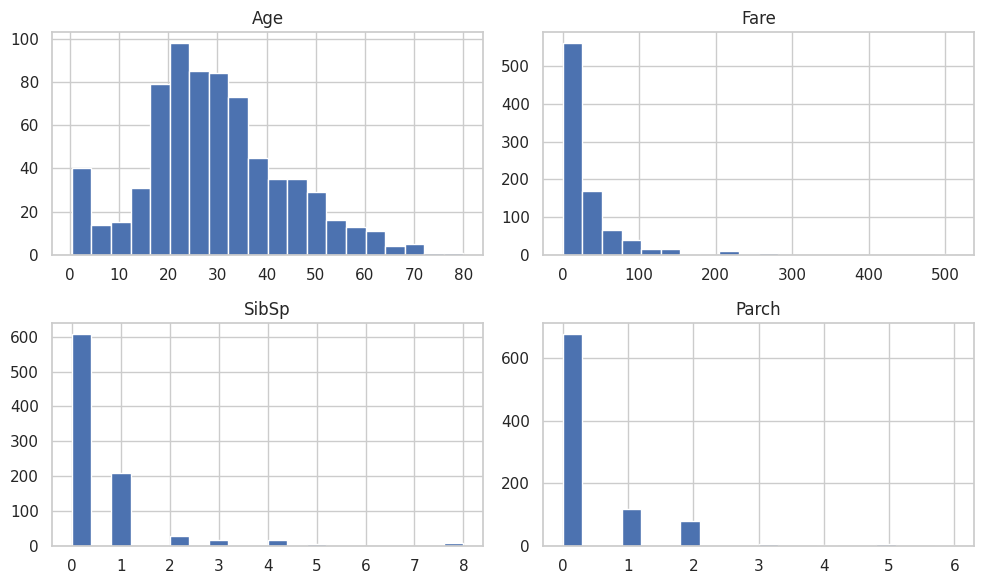

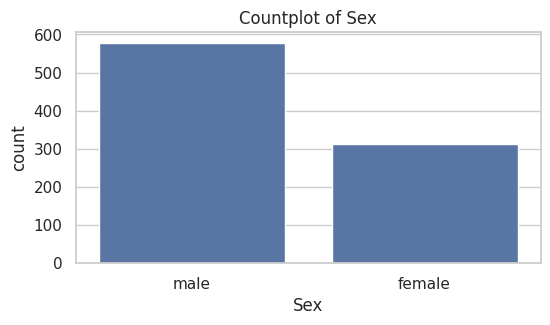

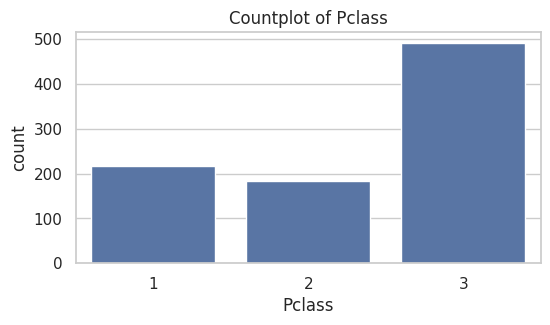

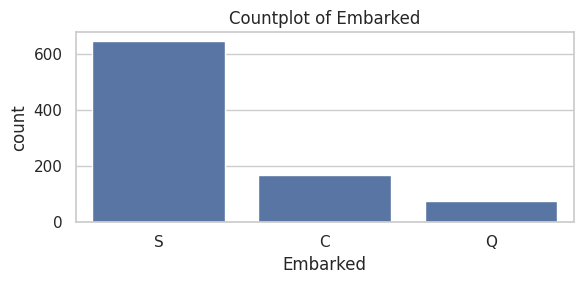

In [ ]:
# 2. Univariate Analysis

numeric_cols = ["Age", "Fare", "SibSp", "Parch"]

# Histograms code is written for you
df[numeric_cols].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

# Write Countplots code for key categorical variables [You need to complete]
cat_cols = ["Sex", "Pclass", "Embarked"]
for col in cat_cols:
  plt.figure(figsize=(6, 3))
  sns.countplot(data=df, x=col)
  plt.title(f"Countplot of {col}")
plt.tight_layout()
plt.show()

#### Write Your insights
- Insight 1:  Age and Fare are right skewed. Most passengers are adults, and most fares are low. A few people paid really high fares.
- Insight 2:  SibSp and Parch are mostly zeros. Most people traveled alone without family. Families are rare, so these features are mostly empty.
- Insight 3:  There are more males than females, class 3 is the largest, and most people boarded at port S.

---
### 3. Bivariate Analysis with Target (15 marks)
Use `Survived` as the target variable.

**Tasks:**
- Compute and plot a **correlation heatmap** for numeric features, including `Survived`.
- Create a **pairplot** for: `Age`, `Fare`, `SibSp`, `Parch`, and `Survived`.
- Write **two to three insights**, including which variables seem associated with survival.


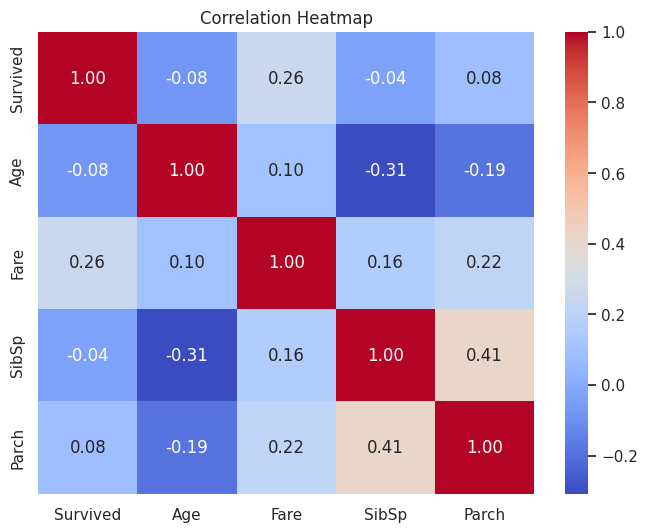

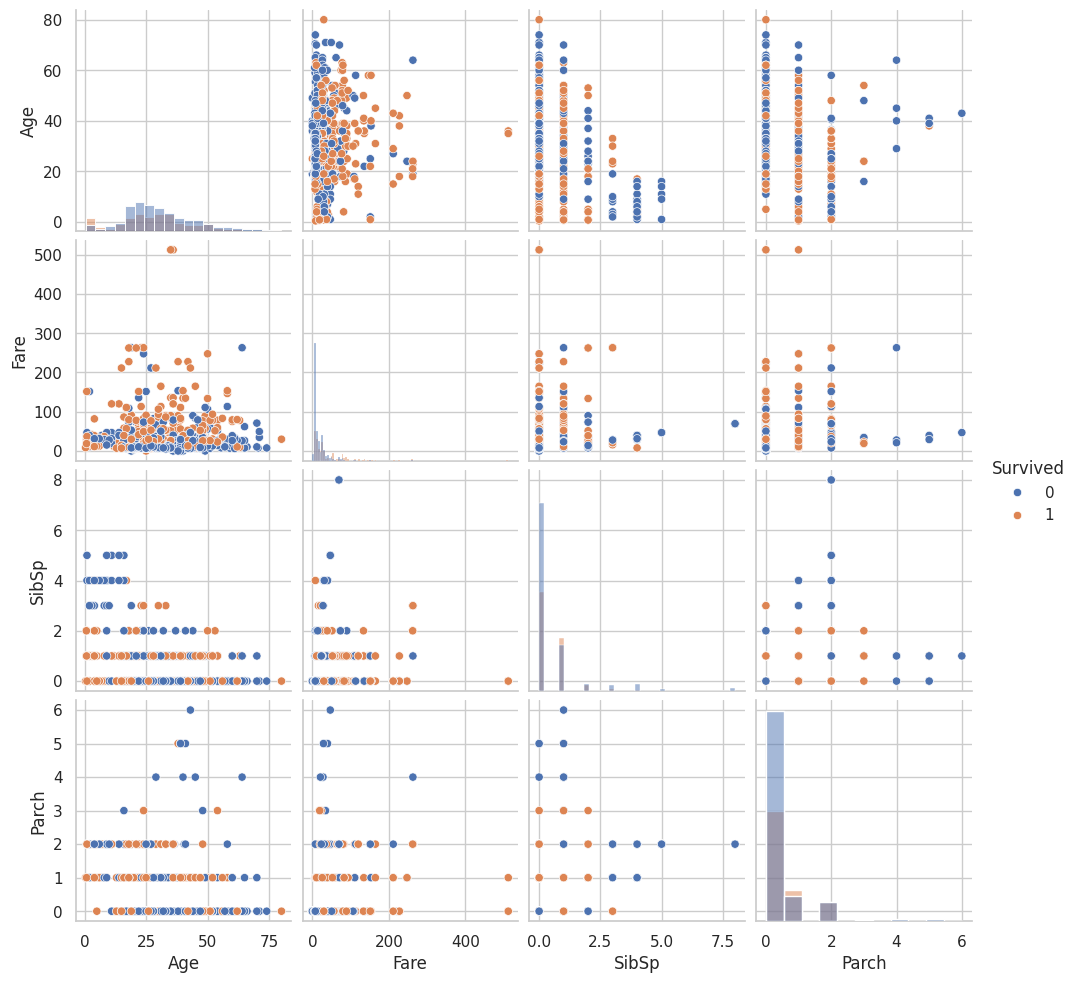

In [ ]:
# 3. Bivariate Analysis with Target

num_for_corr = ["Survived", "Age", "Fare", "SibSp", "Parch"]
## Complete this code block to generate correlation heatmap and pairplot [You need to complete]
plt.figure(figsize=(8,6))
sns.heatmap(df[num_for_corr].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df[num_for_corr], hue="Survived", diag_kind="hist")
plt.show()

#### Your insights
- Insight 1:  Fare matters most
Fare has the highest correlation with survival (0.26). The pairplot shows that people who paid more were more likely to survive than those who paid less.
- Insight 2:   Age has a small negative correlation with survival (-0.08). Younger passengers had slightly better chances, but it's not strong.

---
### 4. Categorical vs Target Analysis (5 marks)
**Tasks:**
For each of the following categorical features: `Sex`, `Pclass`, `Embarked`:
- Plot a **bar chart** showing the proportion of passengers who survived in each category.
- Write **two short insights** about which categories have higher or lower survival chances.



Survival proportion by Sex:


Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


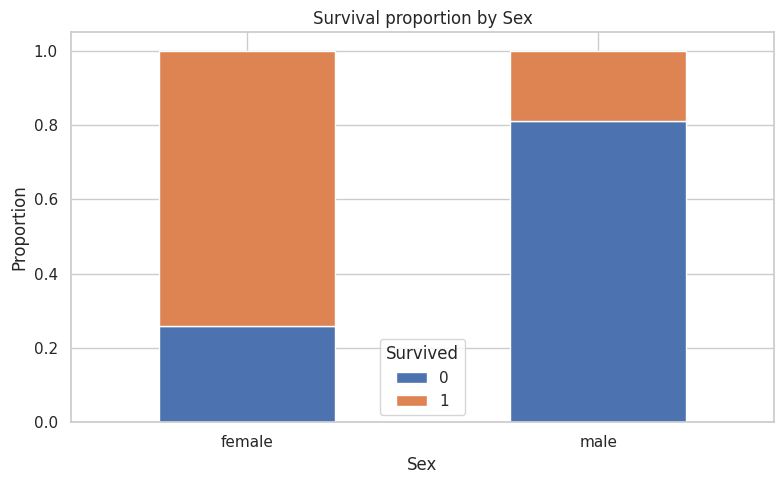


Survival proportion by Pclass:


Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


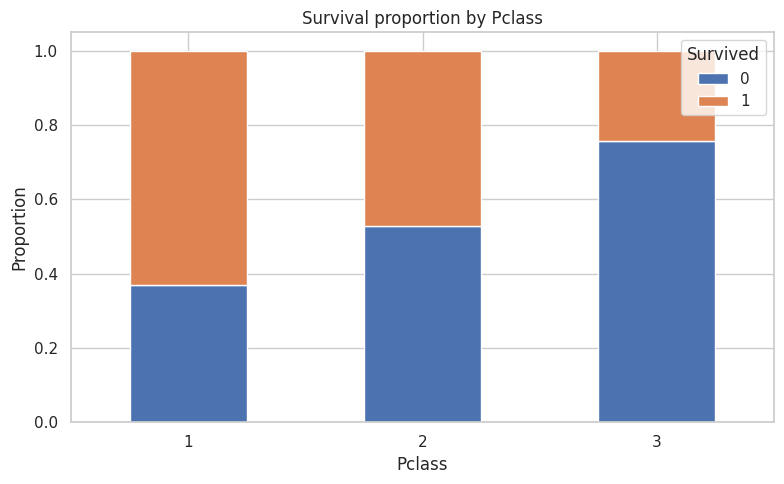


Survival proportion by Embarked:


Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


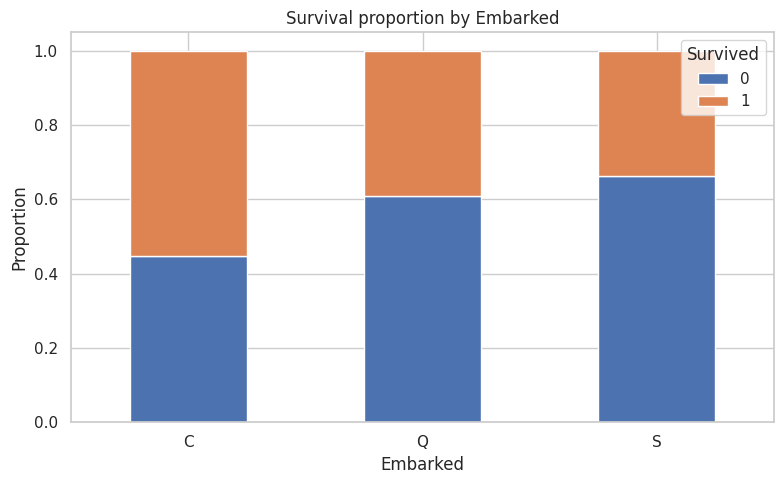

In [ ]:
# 4. Categorical vs Target Analysis [Bar chart code is written for you]

cat_target_cols = ["Sex", "Pclass", "Embarked"]

for c in cat_target_cols:
    ct = pd.crosstab(df[c], df["Survived"], normalize="index")
    print(f"\nSurvival proportion by {c}:")
    display(ct)
    ct.plot(kind="bar", stacked=True)
    plt.title(f"Survival proportion by {c}")
    plt.ylabel("Proportion")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

#### Your insights
- Insight 1:  Females had much higher survival (74%) compared to males (19%), so being female greatly increased survival chances.
- Insight 2:  First-class passengers (63%) and those who boarded at port C (55%) survived more, while third-class (24%) and port S passengers (34%) had lower survival chances.

---
## Part B: Basic Data Preprocessing – 45 marks

Focus: **Handling missing values, encoding categorical variables, and scaling numeric features.**

### 5. Handling Missing Values (10 marks)
**Tasks:**
1. Show the count of missing values in each column.
2. Decide how to handle missing values for:
   - `Age` (numeric)
   - `Embarked` (categorical)
   - `Cabin` (many missing values)
3. Implement your chosen strategy in code.
4. Show missing value counts again to confirm.
5. Explain your choices in **3–4 sentences**.


In [ ]:
# 5. Handling Missing Values

print("Missing values before:") #[Task 1 is done for you]
print(df.isna().sum())

# Drop Cabin (Complete this code block)
df = df.drop(columns=["Cabin"])
# Fill Age (Complete this code block)
df["Age"] = df["Age"].fillna(df["Age"].median())
# Fill Embarked (Complete this code block)
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

print("\nMissing values after handling:")
print(df.isna().sum())

Missing values before:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


#### Explanation of your strategy
- Why you dropped or kept `Cabin`:  Dropped because it has too many missing values (687 out of 891). Keeping it would add noise and not help the model much.
- Why you used median/mean for `Age`:  Filled missing values with the median because Age is numeric and right-skewed. Median is better than mean here since it isn't affected by very high or low ages.
- Why you used mode or another method for `Embarked`:  Filled missing values with the mode because it's a categorical variable. Using the most frequent value is a simple and reasonable way to handle a few missing entries.

---
### 6. Encoding Categorical Variables (15 marks)
Focus on the following categorical features:
- `Sex`
- `Embarked`
- `Pclass` (treat as categorical)

**Tasks:**
- Use `OneHotEncoder` from sklearn to encode these features.
- Keep `Survived` and the main numeric features (`Age`, `Fare`, `SibSp`, `Parch`).
- Show the shape and head of the encoded DataFrame.


In [ ]:
# 6. Encoding Categorical Variables

df_enc = df.copy()

# Select features for encoding and keep important numeric ones
cat_features = ["Sex", "Embarked", "Pclass"]
numeric_features = ["Age", "Fare", "SibSp", "Parch"]
target_col = "Survived"

# One hot encode categorical variables [You need to do]
encoded_df = pd.get_dummies(
    df_enc,
    columns = cat_features,
    dtype = int
    )

# Build final encoded DataFrame
df_model = pd.concat([
    df_enc[[target_col] + numeric_features],
    encoded_df
], axis=1)

print("Shape after encoding:", df_model.shape)
display(df_model.head())

Shape after encoding: (891, 21)


,Survived,Age,Fare,SibSp,Parch,PassengerId,Survived,Name,Age,SibSp,...,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,1,0,1,0,"Braund, Mr. Owen Harris",22.0,1,...,A/5 21171,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,71.2833,1,0,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,...,PC 17599,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,7.9250,0,0,3,1,"Heikkinen, Miss. Laina",26.0,0,...,STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,53.1000,1,0,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,...,113803,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,8.0500,0,0,5,0,"Allen, Mr. William Henry",35.0,0,...,373450,8.0500,0,1,0,0,1,0,0,1


---
### 7. Scaling Numeric Features (15 marks)
**Tasks:**
- Use `StandardScaler` on the numeric features: `Age`, `Fare`, `SibSp`, `Parch`.
- Plot boxplots of these features **before** and **after** scaling.
- Write **two sentences** explaining how scaling changes the numeric values and why it is useful before training some ML models.


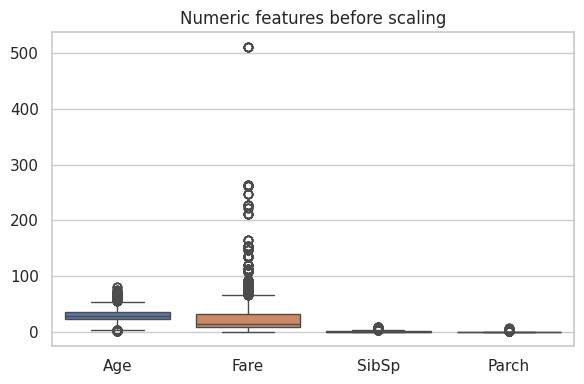

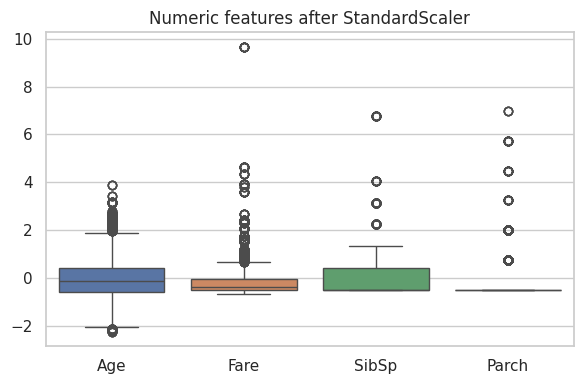

In [ ]:
# 7. Scaling Numeric Features

score_cols = ["Age", "Fare", "SibSp", "Parch"]

# Boxplot before scaling
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_model[score_cols])
plt.title("Numeric features before scaling")
plt.tight_layout()
plt.show()

# Apply StandardScaler [You need to do]
scaler = StandardScaler()
df_scaled = df_model.copy()
df_scaled[score_cols] = scaler.fit_transform(df_scaled[score_cols])

# Boxplot after scaling
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_scaled[score_cols])
plt.title("Numeric features after StandardScaler")
plt.tight_layout()
plt.show()

#### Your observations on scaling
- Sentence 1:  Scaling changes numeric values by shifting them to have a mean of 0 and a similar range, so large and small numbers are comparable. This is useful before training some ML models because it prevents features with bigger values from dominating and helps the model learn more efficiently.
- Sentence 2:  Before scaling, some numbers like Fare are much bigger than others like SibSp or Parch, so the scales are very different. After using StandardScaler, all the numbers are around 0 and have similar ranges. This makes features easier for machine learning models to handle, stops large numbers from dominating, and helps the model learn faster.

---
### 8. Simple Feature Quality Check (5 marks)
**Tasks:**
- Show `.info()` of the final processed DataFrame (`df_scaled`).
- Confirm there are no missing values.
- Confirm that all remaining features are numeric and suitable for most ML models.
- Write **one short concluding remark** about dataset readiness.


In [ ]:
# 8. Simple Feature Quality Check
print(df_scaled.info())

print("\nTotal missing values in final DataFrame:", df_scaled.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Age          891 non-null    float64
 2   Fare         891 non-null    float64
 3   SibSp        891 non-null    float64
 4   Parch        891 non-null    float64
 5   PassengerId  891 non-null    int64  
 6   Survived     891 non-null    int64  
 7   Name         891 non-null    object 
 8   Age          891 non-null    float64
 9   SibSp        891 non-null    float64
 10  Parch        891 non-null    float64
 11  Ticket       891 non-null    object 
 12  Fare         891 non-null    float64
 13  Sex_female   891 non-null    int64  
 14  Sex_male     891 non-null    int64  
 15  Embarked_C   891 non-null    int64  
 16  Embarked_Q   891 non-null    int64  
 17  Embarked_S   891 non-null    int64  
 18  Pclass_1     891 non-null    int64  
 19  Pclass_2

#### Final remark on dataset readiness
- Your remark:  The dataset is now fully cleaned, encoded, and scaled, with no missing values, so it's ready for modeling.

---
## Submission
- Run all cells from top to bottom to make sure everything works.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.